In [2]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Admin\Anaconda_N\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data=load_digits()

In [4]:
(x_train,x_test,y_train,y_test)=train_test_split(data.data/255,data.target.astype("int0"),test_size=0.15)
m=x_train.shape[0]
m1=x_test.shape[0]
x_train=x_train.reshape(m,8,8,1)
x_test=x_test.reshape(m1,8,8,1)
x_train.shape

(1527, 8, 8, 1)

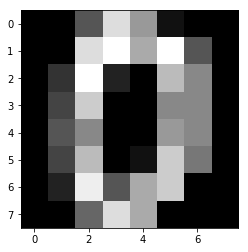

In [5]:
plt.gray()
plt.imshow(data.images[0]) 


In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,Activation,MaxPooling2D,Flatten
import keras.backend as k

In [10]:
model=Sequential()
model.add(Conv2D(32, (3, 3) ,padding="same",activation='relu', input_shape=(8,8,1)))
model.add(Conv2D(32, (3, 3) ,padding="same",activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train, epochs=40, batch_size=64, validation_data=(x_test,y_test),shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 1527 samples, validate on 270 samples
Epoch 1/40
1527/1527 [==============================] - 8s 5ms/step - loss: 2.3008 - acc: 0.1015 - val_loss: 2.2809 - val_acc: 0.4926
Epoch 2/40
1527/1527 [==============================] - 3s 2ms/step - loss: 1.9652 - acc: 0.3039 - val_loss: 0.9446 - val_acc: 0.7037
Epoch 3/40
1527/1527 [==============================] - 3s 2ms/step - loss: 0.8941 - acc: 0.6896 - val_loss: 0.4122 - val_acc: 0.8593
Epoch 4/40
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5488 - acc: 0.8120 - val_loss: 0.2908 - val_acc: 0.9037
Epoch 5/40
1527/1527 [==============================] - 3s 2ms/step - loss: 0.3489 - acc: 0.8946 - val_loss: 0.1937 - val_acc: 0.9333
Epoch 6/40
1527/1527 [==============================] - 3s 2ms/step - loss: 0.2547 - acc: 0.9136 - val_loss: 0.1384 - val_acc: 0.9444
Epoch 7/40
1527/1527 [==============================] - 3s 2ms/step - loss: 0.1921 - acc: 0.9437 - va

In [15]:
l=model.predict(x_test)
y_pred=np.argmax(l,axis=1)
y_pred

array([1, 6, 2, 6, 9, 4, 7, 2, 5, 2, 0, 6, 8, 8, 6, 8, 7, 4, 3, 9, 4, 4,
       5, 2, 8, 4, 3, 2, 0, 5, 9, 1, 3, 3, 4, 6, 8, 5, 6, 1, 2, 9, 8, 8,
       7, 4, 1, 7, 7, 7, 8, 0, 5, 1, 3, 9, 1, 8, 5, 1, 6, 2, 5, 5, 2, 8,
       5, 0, 9, 3, 7, 0, 8, 7, 7, 3, 3, 6, 4, 4, 3, 4, 1, 1, 2, 4, 2, 0,
       1, 9, 5, 1, 3, 7, 7, 5, 6, 9, 8, 9, 8, 9, 5, 4, 4, 3, 2, 1, 2, 5,
       2, 7, 3, 1, 1, 7, 2, 2, 2, 4, 2, 5, 9, 7, 2, 4, 0, 0, 5, 5, 7, 1,
       5, 5, 1, 5, 0, 5, 7, 4, 4, 8, 1, 4, 6, 3, 5, 6, 6, 3, 8, 1, 4, 6,
       4, 4, 6, 6, 8, 8, 0, 4, 9, 5, 0, 0, 7, 0, 2, 1, 3, 7, 4, 6, 4, 5,
       4, 0, 8, 4, 7, 4, 7, 9, 2, 5, 9, 5, 3, 1, 9, 4, 1, 4, 5, 9, 7, 8,
       7, 9, 0, 1, 0, 3, 1, 3, 9, 8, 3, 0, 9, 9, 0, 6, 4, 2, 0, 8, 3, 1,
       6, 6, 1, 7, 4, 6, 7, 6, 8, 9, 1, 2, 3, 7, 0, 1, 2, 0, 1, 3, 3, 0,
       8, 1, 6, 5, 0, 7, 2, 3, 7, 1, 7, 0, 8, 1, 6, 6, 7, 9, 2, 0, 8, 3,
       5, 8, 9, 6, 7, 6], dtype=int64)

In [16]:
y_test

array([1, 6, 2, 8, 9, 4, 7, 2, 5, 2, 0, 6, 8, 8, 6, 8, 7, 4, 3, 9, 4, 4,
       5, 2, 8, 4, 3, 2, 0, 5, 9, 1, 3, 3, 4, 6, 8, 5, 6, 1, 8, 9, 8, 8,
       7, 4, 1, 7, 7, 7, 8, 0, 5, 1, 3, 9, 1, 8, 5, 1, 6, 2, 5, 5, 2, 8,
       5, 0, 9, 3, 7, 0, 8, 7, 7, 3, 3, 6, 4, 4, 3, 4, 1, 1, 2, 4, 2, 0,
       1, 9, 5, 1, 3, 7, 7, 5, 6, 9, 8, 9, 8, 9, 5, 0, 4, 3, 2, 1, 2, 5,
       2, 7, 3, 1, 1, 7, 2, 2, 2, 4, 2, 5, 9, 7, 2, 4, 0, 0, 5, 5, 7, 1,
       5, 5, 1, 5, 0, 5, 7, 4, 4, 8, 1, 4, 6, 3, 5, 6, 6, 3, 8, 1, 4, 6,
       4, 4, 6, 6, 8, 8, 0, 4, 9, 5, 0, 0, 7, 0, 2, 1, 3, 7, 4, 6, 4, 5,
       4, 0, 8, 4, 7, 4, 7, 9, 2, 5, 9, 5, 3, 1, 9, 4, 1, 4, 5, 9, 7, 8,
       7, 9, 0, 1, 0, 3, 1, 3, 9, 8, 3, 0, 9, 9, 0, 6, 4, 2, 0, 8, 3, 1,
       6, 6, 1, 7, 4, 6, 7, 6, 8, 9, 1, 2, 3, 7, 0, 1, 2, 0, 1, 3, 3, 0,
       8, 1, 6, 5, 0, 7, 2, 3, 7, 1, 7, 0, 8, 1, 6, 6, 7, 9, 2, 0, 8, 3,
       5, 8, 9, 6, 7, 6], dtype=int64)

In [17]:
target_names=["class 0","class 1","class 2","class 3","class 4","class 5","class 6","class 7","class 8","class 9"]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      0.96      0.98        26
    class 1       1.00      1.00      1.00        31
    class 2       0.96      1.00      0.98        24
    class 3       1.00      1.00      1.00        25
    class 4       0.97      1.00      0.98        30
    class 5       1.00      1.00      1.00        28
    class 6       0.96      1.00      0.98        25
    class 7       1.00      1.00      1.00        30
    class 8       1.00      0.93      0.96        28
    class 9       1.00      1.00      1.00        23

avg / total       0.99      0.99      0.99       270



In [115]:
import cv2
import matplotlib.pyplot as plt

array(None, dtype=object)

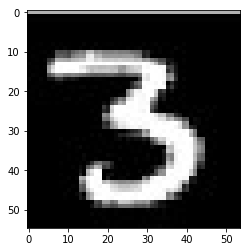

In [121]:
img=cv2.imread(r"download1.jpg")
plt.gray()
plt.imshow(img,cmap = plt.get_cmap(name = 'gray'))
img=img.resize(1,8,8,1)
arr=np.array(img)
arr

In [122]:
l=model.predict(arr)
y_pred=np.argmax(l,axis=1)
y_pred

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape ()

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

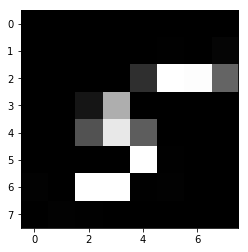

In [11]:
img = Image.open(r"download8.jpg")
img=img.resize((8,8))
plt.imshow(img)

In [177]:
pix_val = list(img.getdata())
len(pix_val)

64

In [178]:
pix_val=np.array(pix_val)
pix_val=pix_val[:,0].reshape(1,8,8,1)
pix_val=pix_val/255
pix_val

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00784314],
         [0.25882353],
         [0.74117647],
         [0.48627451],
         [0.16078431],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.01960784],
         [0.07058824],
         [0.00392157],
         [0.        ],
         [0.88627451],
         [0.18431373],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [1.        ],
         [0.99607843],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.5254902 ],
         [1.        ],
         [0.00784314],
         [0.        ]],

        [[0.        ],
         [0.00784314],
         [0.        ],
 

In [179]:
l=model.predict(pix_val)
y_pred=np.argmax(l,axis=1)
y_pred

array([3], dtype=int64)